In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [6]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [10]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

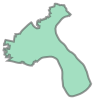

In [11]:
zipcodes.loc[0, 'geometry']

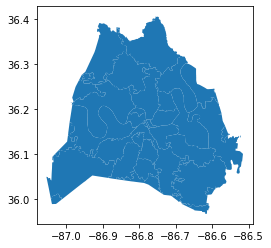

In [12]:
zipcodes.plot();

In [13]:
markers= gpd.read_file('../data/Historical_Markers.geojson')
print(markers.shape)
markers.head(3)

(255, 9)


,number,location,latitude,marker_name,marker_text,longitude,year_erected,civil_war_site,geometry
0,120,"Hume-Fogg High School, 700 Broadway",36.159303,Randall Jarrell 1914-1965,"Distinguished poet, critic, novelist, and teac...",-86.781572,2005,None,POINT (-86.78157 36.15930)
1,78,Belle Meade Boulevard at Warner Park entrance,36.083058,Percy Warner Park 2058.1 Acres,Percy Warner (1861-1927) was a pioneer in elec...,-86.867129,1982,None,POINT (-86.86713 36.08306)
2,94,Union Street and Capitol Boulevard,36.163758,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",-86.78287,1995,None,POINT (-86.78287 36.16376)


In [15]:
markers_geo = gpd.GeoDataFrame(markers, 
                           crs = zipcodes.crs, 
                           geometry = markers['geometry'])

In [16]:
type(markers_geo)

geopandas.geodataframe.GeoDataFrame

In [17]:
markers_by_zip = gpd.sjoin(markers_geo, zipcodes, op = 'within')

In [18]:
markers_by_zip.head(5)

,number,location,latitude,marker_name,marker_text,longitude,year_erected,civil_war_site,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,120,"Hume-Fogg High School, 700 Broadway",36.159303,Randall Jarrell 1914-1965,"Distinguished poet, critic, novelist, and teac...",-86.781572,2005,None,POINT (-86.78157 36.15930),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
10,14,801 Broadway,36.158648,Nashville Centennial 1780-1880,"On April 24, 1880, Nashville began a month-lon...",-86.782508,1969,None,POINT (-86.78251 36.15865),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
11,140,34 Music Square East,36.149432,Bradley Studios,"In 1955, brothers Owen and Harold Bradley buil...",-86.792024,2011,None,POINT (-86.79202 36.14943),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
15,12,"Hume-Fogg High School, 700 Broadway",36.159303,Nashville’s First Public School,"Nashville’s first public school, Hume School, ...",-86.781572,1969,None,POINT (-86.78157 36.15930),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
17,87,Eighth Avenue North and Charlotte Pike,36.164267,Nashville Sit-ins,Formerly located at this site was First Baptis...,-86.785598,1992,None,POINT (-86.78560 36.16427),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875


In [19]:
markers_by_zip['zip'].value_counts()

37203    50
37212    18
37208    18
37209    14
37210    13
37205    12
37206    12
37201    11
37013     8
37221     8
37204     8
37215     8
37219     7
37217     7
37214     6
37211     6
37218     5
37207     5
37220     5
37115     4
37138     4
37076     3
37228     3
37213     2
37072     2
37216     2
37189     1
37080     1
37027     1
Name: zip, dtype: int64

In [22]:
markers_in_37209 = markers_by_zip.loc[markers_by_zip['zip'] == '37209']
markers_in_37209.shape

(14, 15)

In [23]:
polygon37209 = zipcodes.loc[zipcodes['zip'] == '37209']
polygon37209.shape

(1, 6)

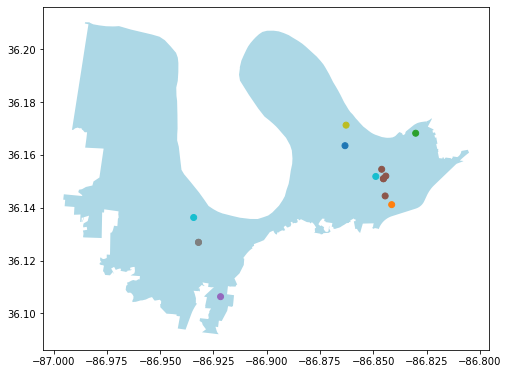

In [25]:
ax = polygon37209.plot(figsize = (8, 10), color = 'lightblue')
markers_in_37209.plot( ax = ax, column = 'year_erected');
plt.show();

In [27]:
polygon37209.geometry.centroid

C:\Users\jessi\AppData\Local\Temp/ipykernel_6248/283130122.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37209.geometry.centroid


12    POINT (-86.91816 36.15605)
dtype: geometry

In [28]:
center = polygon37209.geometry.centroid[12]
print(center)

POINT (-86.91816342256455 36.15604558838379)


C:\Users\jessi\AppData\Local\Temp/ipykernel_6248/3183202573.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37209.geometry.centroid[12]


In [29]:
area_center = [center.y, center.x]
print(area_center)

[36.15604558838379, -86.91816342256455]


In [30]:
map_37209 = folium.Map(location =  area_center, zoom_start = 12)
map_37209

In [31]:
map_37209 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37209).add_to(map_37209)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in markers_in_37209.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37209)

#display our map
map_37209

KeyError: 'lat'